**Exercise 1:** Calculate radial velocity and redshift given the rest wavelenght ($\lambda_0$) and observational wavelenght ($\lambda$) of the object. To spice things up, you should take into account both relativistic and non-relativistic cases for calculating radial velocity (take $0.1 c$ as threshold).

Non-relativistic formula:

$$z = \frac{\lambda - \lambda_0}{\lambda_0} = \frac{\Delta \lambda}{\lambda_0}= \frac{v}{c}$$

Relativistic formula:

$$z = \frac{\Delta \lambda}{\lambda_0} = \sqrt{\frac{1+v/c}{1-v/c}} - 1$$


Steps to create an implementation in Python:

- Calculate redshift `z` using observed and rest wavelenghts
- Use the given thrashold to decide which formula to use for calculating `v`. You can use the following Python construction:

```
if condition:
   # relativistic formula
   v = ...
else:
   # non-relativistic formula
   v = ...
```
- print the values of `v` and `z` (nicely formated)

In [32]:
lambda_rest = 656.28    # H-alpha line wavelength (nm)
lambda_observed = 1500  # try different values (nm): 750, 850, 1500, 620
c = 3e5                 # speed of light (km/s)

delta_lambda = lambda_observed - lambda_rest
z = delta_lambda/lambda_rest

if z > 0.1:
    print("We used formula for relativistic case")
    v = c * ((z+1)**2 - 1) / ((z+1)**2 + 1)

else:
    print("We used formula for non-relativistic case")
    v = z * c
    
print(f"z = {z:.2f}")
print(f"v = {v:.1e} km/s")

We used formula for relativistic case
z = 1.29
v = 2.0e+05 km/s


**Exercise 2:** Create a program that calculates the roots of a second degree polynomial $y=ax^2+bx+c$. Your program needs to know from the user what are the values are of a, b and c.

In [14]:
import math
import cmath

x = input("Enter the value of a, b and c:")
a, b, c = eval(x)

D = (b**2)-(4*a*c)

if D >= 0:
    x1 = (-b+math.sqrt(D))/(2*a)
    x2 = (-b-math.sqrt(D))/(2*a)
    print("x1=", x1)
    print("x2=", x2)
else:
    # if D < 0, we need to introduce complex numbers
    # cmath module provides functions for dealing with complex numbers
    # complex() converts real number to complex one.
    x1 = (-b+cmath.sqrt(complex(D)))/(2*a)
    x2 = (-b-cmath.sqrt(complex(D)))/(2*a)
    print("x1=", x1)
    print("x2=", x2)

Enter the value of a, b and c:2,-6,5
x1= (1.5+0.5j)
x2= (1.5-0.5j)


**Exercise 3:** Write a function that calculates a distance to a star, given its apparent magnitude and absolute magnitude, in units of light-years.

In [15]:
def distance(M,m):
    d = 10**(((m-M)/5)+1)
    d = d*3.26156 # conversion from pc to ly
    return d

**Exercise 4:** Write a script that determines a quadrant for a given point in Cartesian coordinates.

*Hint:* [atan2](https://www.geeksforgeeks.org/atan2-function-python/) function from `math` module could be of help.

In [20]:
from math import *
x = input('Enter a value for x:')
y = input('Enter a value for y:')

x = float(x)
y = float(y)

angle = atan2(y,x)
angle = degrees(angle)
print('Angle between x-axis and point (x,y) is:', angle, 'degrees')

if 0<=angle<90:
    print('Point(x,y) belongs to I quadrant')
elif 90<=angle<180:
    print('Point(x,y) belongs to II quadrant')
elif 180<=angle<270:
    print('Point(x,y) belongs to III quadrant')
elif 270<=angle<360:
    print('Point(x,y) belongs to IV quadrant')

Enter a value for x:1
Enter a value for y:1
Angle between x-axis and point (x,y) is: 45.0 degrees
Point(x,y) belongs to I quadrant


**Exercise 5:** Implement a function that calculates spectral radiance using the Planck's law. The function should have two input parameters: temperature and wavelength. Plot the spectral radiance as a function of wavelength for several values of temperature.

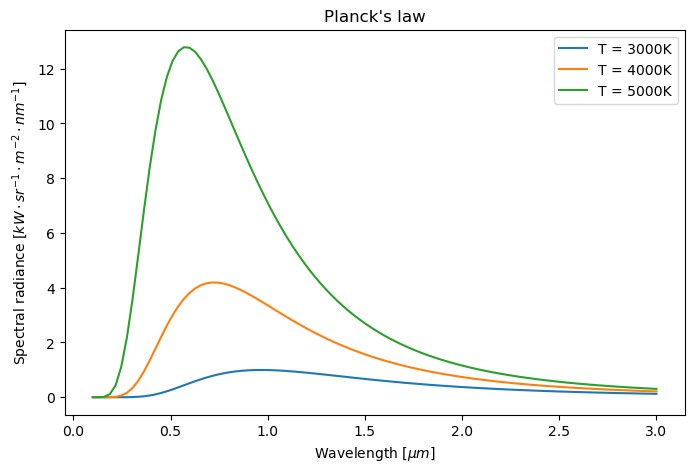

In [30]:
def planck(lamb, T):
    
    h = 6.6260*10**(-34)  # Planck's constant [Js]
    k = 1.3806*10**(-23)  # Boltzmann's constant [J/K]
    c = 2.9979*10**(8)    # the speed of light [m/s]
    
    B = (2*h*c**2)/(lamb**5)*(1/(np.exp((h*c)/(lamb*k*T))-1))
    
    return B


um_to_m = 10**(-6)
nm_to_m = 10**(-9)
kW_to_W = 10**(-3)

um_Wavelengths = np.linspace(0.1, 3, 100)   # 0.1 ~ 3 [um]
K_Temperatures = [3000, 4000, 5000]     # [K]
m_Wavelengths = um_Wavelengths*um_to_m

# Plotting

plt.figure(figsize=(8,5))      # create an empty figure

for temp in K_Temperatures :
    
    Spectral_Radiance = planck(m_Wavelengths, temp)              # [W/sr/m^-3]
    Re_Spectral_Radiance = Spectral_Radiance*nm_to_m*kW_to_W     # [kW/sr/m^-2/nm^-1]
    plt.plot(um_Wavelengths, Re_Spectral_Radiance, 
             label = "T = "+str(temp)+"K")

plt.title("Planck's law")
plt.xlabel("Wavelength [$\mu m$]")
plt.ylabel("Spectral radiance [$kW \cdot sr^{-1} \cdot m^{-2} \cdot nm^{-1}$]")
plt.legend()
plt.show()

**Exercise 6:** Can you replicate this plot using NumPy and matplotlib?

<br>
<div>
<img src="assets/example.png" width="400"/>
</div>

Hints:
- you can generate dummy data using [np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function.
- use [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to select relevant part of the parameter space.

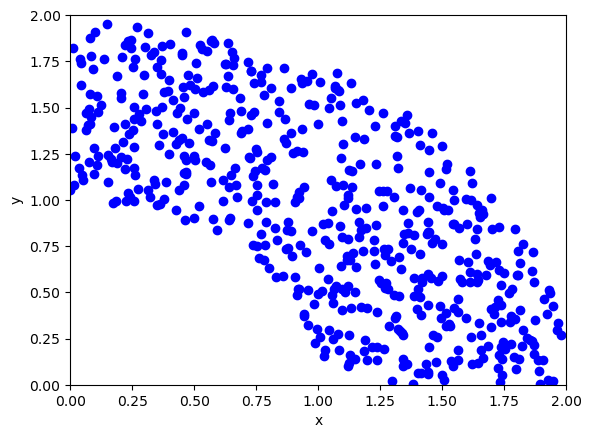

In [22]:
from matplotlib import pyplot as plt
import numpy as np

x = np.random.uniform(0, 2, size=1000)
y = np.random.uniform(0, 2, size=1000)

D = np.sqrt((x**2)+(y**2))

filtered = np.where((D>1)&(D<2), D, 0)
index = np.where(filtered!=0)
newx = x[index]
newy = y[index]

plt.plot(newx, newy, 'bo')
plt.axis([0, 2, 0, 2])
plt.xlabel("x")
plt.ylabel("y")
plt.show()